7 17 2
98 24 26
99 25 10


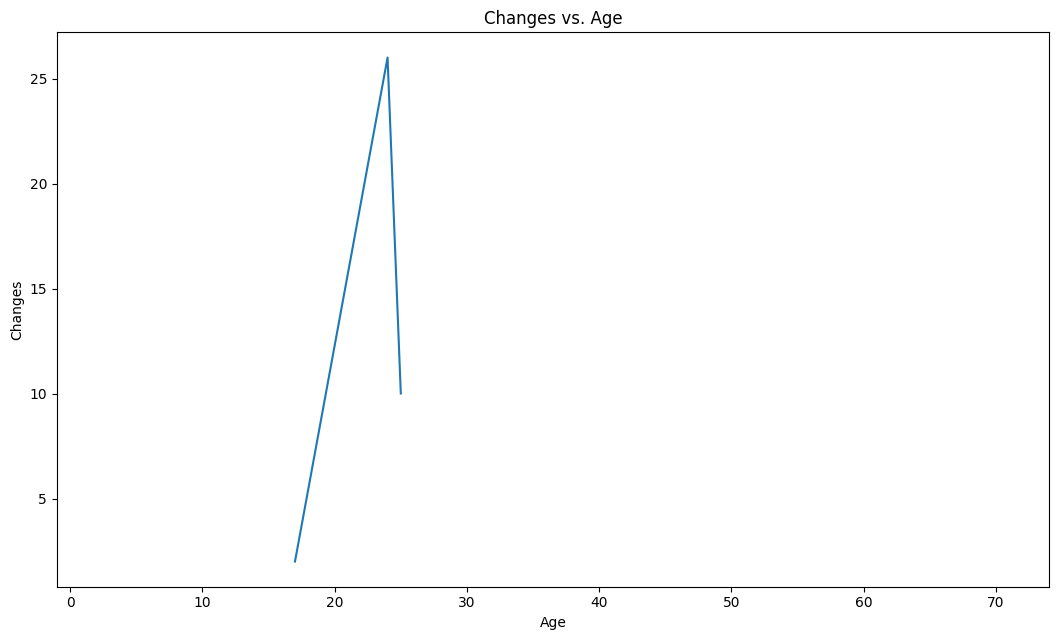

In [1]:
from utils import Events, X_PIXELS, Y_PIXELS
import matplotlib.pyplot as plt
from peewee import fn
import json

query = (
    Events.select(
        Events.participant_id,
        fn.COUNT().alias("event_count"),
    )
    .group_by(Events.participant_id)
    .where(Events.event.startswith("SET_"))
).execute()


fig, ax = plt.subplots(figsize=(X_PIXELS / 200, Y_PIXELS / 200))

# Look up the participant age in participants.json
# Add the age to the query result
file = open("participants.json", "r")
participants = json.load(file)
file.close()

for row in query:
    row.age = participants[str(row.participant_id)]["age"]
# Get the min and max age from participants.json
min_age = min([participants[key]["age"] for key in participants])
max_age = max([participants[key]["age"] for key in participants])

ax.set_xlim(min_age - 1, max_age + 1)

# Plot the data with a line plot, and add a line of best fit
x = [record.age for record in query]
y = [record.event_count for record in query]

for row in query:
    print(row.participant_id, row.age, row.event_count)

plt.plot(x, y)
plt.xlabel("Age")
plt.ylabel("Changes")
plt.title("Changes vs. Age")
plt.show()